# Personal simulations before migrating to the full Trachoma model

## Birth and death model

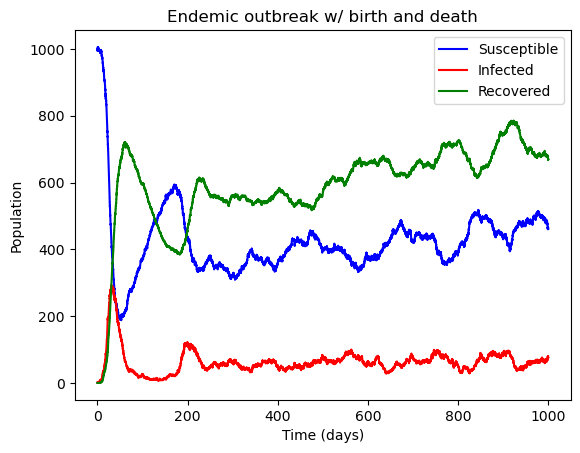

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_outbreak(S0, I0, R0, beta, gamma, mu, nu, total_time):
    
    S, I, R, t = S0, I0, R0, 0
    
    S_vals = [S]
    I_vals = [I]
    R_vals = [R]
    times = [t]
    
    while t < total_time:
        
        N = S+I+R
        
        rates = np.array([beta*S*I/N, # Infection
                 gamma*I,    # Recovery
                 nu*N,       # Birth
                 mu*S,       # S dies
                 mu*I,       # I dies
                 mu*R        # R dies
                ])
        
        total_rate = sum(rates) 
        if total_rate == 0:
            break  
        dt = np.random.exponential(1/total_rate)
        t += dt
        
        event = np.random.choice(len(rates), p = rates/total_rate)
        
        if event == 0:
            S, I = S-1, I+1
        elif event == 1:
            I, R = I-1, R+1
        elif event == 2:
            S += 1
        elif event == 3:
            S -= 1
        elif event == 4:
            I -= 1
        elif event == 5:
            R -= 1
            
        S_vals.append(S)
        I_vals.append(I)
        R_vals.append(R)
        times.append(t)
        
    return S_vals, I_vals, R_vals, times
            
# rate parameters
beta = 0.3
gamma = 0.1
mu = 0.01
nu = 0.01

# run parameters
S0 = 999
I0 = 1
R0 = 0
total_time = 1000

sus, inf, rec, time = simulate_outbreak(S0, I0, R0, beta, gamma, mu, nu, total_time)

plt.plot(time, sus, color = 'blue', label = 'Susceptible')
plt.plot(time, inf, color = 'red', label = 'Infected')
plt.plot(time, rec, color = 'green', label = 'Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Endemic outbreak w/ birth and death')
plt.legend()

### Determining parameters to achieve a specific equilibrium level of infections

In [2]:
def 

SyntaxError: invalid syntax (1885169875.py, line 1)

### First attempts at annual mass vaccination, under a deterministic model

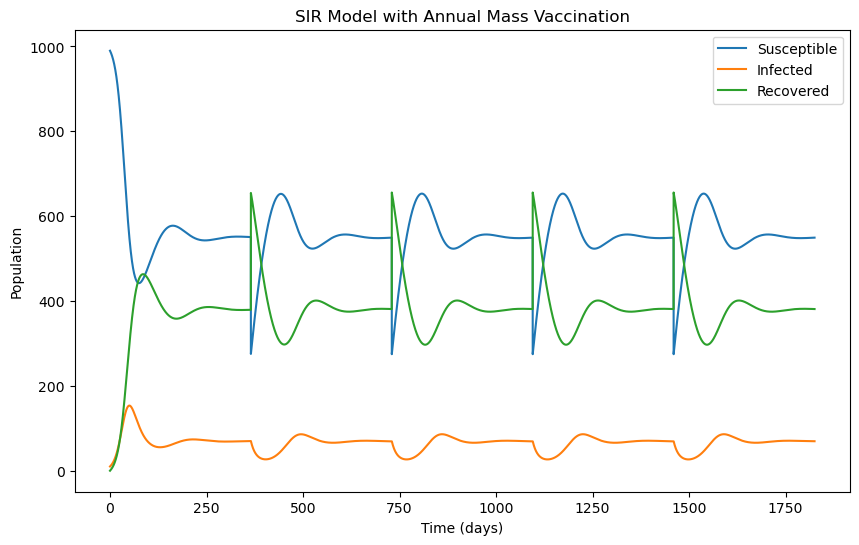

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rs = 1/120         # re-susceptibility rate = waning immunity
beta = 0.2         # infection rate
gamma = 0.1        # recovery rate
mu = 0.01          # birth-death rate
v_rate = 0.5       # vaccination coverage when administered
N = 1000           # population size

# Initial conditions
S0 = 990           
I0 = 10            
R0 = 0            

# Time parameters
T = 365*5            # number of days
dt = 0.1           # time step for numerical
days_per_year = 365
t = np.linspace(0, T, int(T/dt))

# compartment populations
S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

# initial conditions
S[0] = S0
I[0] = I0
R[0] = R0

# function to apply vaccination
def apply_vaccination(S, R, v_rate):
    vaccinated = v_rate * S
    S -= vaccinated
    R += vaccinated
    return S, R

# numerical approach to solving the system of ODEs
for i in range(1, len(t)):
    if i % int(days_per_year/dt) == 0:  # vaccinate each year, excluding day 0
        S[i-1], R[i-1] = apply_vaccination(S[i-1], R[i-1], v_rate)
    
    dSdt = mu * (S[i-1] + I[i-1] + R[i-1]) - beta * S[i-1] * I[i-1] / N - mu * S[i-1] + rs * R[i-1]
    dIdt = beta * S[i-1] * I[i-1] / N - gamma * I[i-1] - mu * I[i-1]
    dRdt = gamma * I[i-1] - mu * R[i-1] - rs * R[i-1]
    
    S[i] = S[i-1] + dSdt * dt
    I[i] = I[i-1] + dIdt * dt
    R[i] = R[i-1] + dRdt * dt

plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with Annual Mass Vaccination')
plt.legend()
plt.show()


## Individual-based SIR model

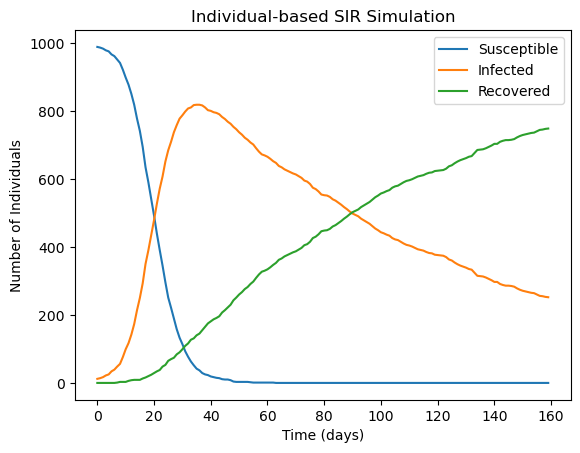

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# parameters
population_size = 1000
initial_infected = 10
contact_rate = 0.01
transmission_probability = 0.1
recovery_rate = 0.01
simulation_days = 160
age_groups = [0, 1, 2, 3, 4, 5]  # arbitrary groups for now
infectivity_by_age = [0.35, 0.3, 0.25, 0.2, 0.15, 0.1]  # infectivity decreases with age

# states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2

# initialize population
population = []
for k in range(population_size):
    age = random.choice(age_groups)
    state = SUSCEPTIBLE
    if initial_infected > 0:
        state = INFECTED
        initial_infected -= 1
    population.append({'state': state, 'age': age, 'infectivity': infectivity_by_age[age]})
random.shuffle(population)

# store counts after each day
susceptible_count = []
infected_count = []
recovered_count = []

# simulate each day of outbreak
for day in range(simulation_days):

    for i in range(population_size):
        if population[i]['state'] == INFECTED:
            # Check if the infected person recovers
            if random.random() < recovery_rate:
                population[i]['state'] = RECOVERED
            else:
                # Try to infect susceptible individuals
                for c in range(int(contact_rate * population_size)):  # number of contacts per day
                    contact = random.choice(population)
                    if contact['state'] == SUSCEPTIBLE and random.random() < (transmission_probability * population[i]['infectivity']):
                        contact['state'] = INFECTED

    # Record counts
    susceptible_count.append(len([person for person in population if person['state'] == SUSCEPTIBLE]))
    infected_count.append(len([person for person in population if person['state'] == INFECTED]))
    recovered_count.append(len([person for person in population if person['state'] == RECOVERED]))

# Plotting the results
plt.plot(susceptible_count, label='Susceptible')
plt.plot(infected_count, label='Infected')
plt.plot(recovered_count, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('Individual-based SIR Simulation')
plt.legend()
plt.show()

## Individual-based model with demography and MDA - aim to add vaccination too!

This model will mimic the approach of the translation of the Borlase R code. At each timestep, the age, infective status, bacterial load etc. of each person (represented by the indices) is stored, and we may retrieve the number of infectives at each time for plotting. Time is in weeks (multiply by 7 to retrieve days) and people are split into three general age groups: young children, old children, and adults

The treatment matrix keeps track of who receives MDA treatment and when, allowing for SNC
Vaccination treatment should use a different matrix (when incorporated)

Simulation parameters: simulation time, burn-in (time until MDA starts), MDA (soon to include vax) frequency, number of rounds of MDA (and vax)

Population parametes: N, duration of infection/disease, reduction of infection/diseaes, durations of infection and disease, parameters for lambda function, MDA (soon vax) coverage and efficiency, and rho (ommitted, related to SNC) 

Demographic parameters: tau (death rate), max age, mean age

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Infection probability and reset age

In [6]:
# rate depends on parameters and diseased individuals
def lambda_rate(params, Age, demog, bact_load, IndD, bet):
    v_1, v_2, phi, epsilon = params['v_1'], params['v_2'], params['phi'], params['epsilon']
    N, max_age = params['N'], demog['max_age']
    
    totalLoad = [0,0,0]
    y_children = np.where((Age >= 0) & (Age < 9*52))[0] # young children = 0-9
    totalLoad[0] = np.sum(bact_load[y_children]) / len(y_children) # average bacterial load?
    o_children = np.where((Age >= 9*52) & (Age < 15*52))[0] # older children = 9-15
    totalLoad[1] = np.sum(bact_load[o_children]) / len(o_children)
    adults = np.where(Age >= 15*52)[0]
    totalLoad[2] = np.sum(bact_load[adults]) / len(adults)
    
    prevLambda = bet * (v_1 * np.array(totalLoad) + v_2 * np.array(totalLoad) ** (phi + 1))
    
    # tile function repeats proportions, forming 3 identical rows
    demog_matrix = np.transpose(np.tile(np.array([len(y_children), len(o_children), len(adults)]) / N, (3, 1)))
    social_mixing = (epsilon * np.eye(3) + (1 - epsilon)) * demog_matrix
    
    lambda_ = np.dot(social_mixing, prevLambda)
    
    # adjust lambda based on disease status
    age_intervals = np.searchsorted([0, 9*52, 15*52, max_age*52], Age)
    adjusted_lambda = lambda_[age_intervals - 1] * (0.5 + 0.5 * (1 - IndD))
    
    return adjusted_lambda

def reset_age(Age, demog, params):
    tau, max_age, N = demog['tau'], demog['max_age'], params['N']
    # if an individual dies or reaches max age, replace them with a susceptible newborn
    reset_indivs = np.where((np.random.uniform(size=N) < 1 - np.exp(-tau)) | (Age > max_age))[0]
    return reset_indivs

### Treatment matrix (add vax matrix later)

In [7]:
# decide who gets treatment when
def tx_matrix(params, sim_params):
    N, N_MDA, MDA_Cov, rho = params['N'], sim_params['N_MDA'], params['MDA_Cov'], params['rho']
    ind_treat = np.zeros((N, N_MDA)) # must be an N by N_MDA matrix
    
    for i in range(N): # work through each individual
        z = np.random.uniform(size = N)
        ind_treat[:, 0] = z < MDA_Cov # chosen so roughly MDA_Cov% of people get the first treatment
        for k in range(1, N_MDA): # determine which rounds each person receives
            prob = (MDA_Cov * (1 - rho) + (rho * np.sum(ind_treat[i, :k]))) / (1 + (k - 1) * rho) # decrease with rho, k
            ind_treat[i, k] = np.random.binomial(1, prob)
    
    return ind_treat

### Timesteps for MDA and indexing who is cured

In [8]:
# return the timestamps of when MDA occurs
def set_t_MDA(sim_params):
    burnin, N_MDA, freq_MDA = sim_params['burnin'], sim_params['N_MDA'], sim_params['freq_MDA']
    MDA_times = []
    for i in range(N_MDA):
        MDA_times.append(burnin + i * 52 * freq_MDA + 52) # add 52 to start 1 year after burnin
        
    return MDA_times

# decide who is treated during community-wide MDA
def doMDA(params, Age, MDA_round, tx_mat):
    MDA_eff = params['MDA_eff']
    
    babies = np.where(Age < 26)[0]
    treated_b = babies[np.where(tx_mat[babies, MDA_round-1] == 1)[0]]
    cured_b = treated_b[np.where(np.random.uniform(size = len(treated_b)) < (MDA_eff * 0.5))[0]] # multiplier due to method
    
    older = np.where(Age > 26)[0]
    treated_o = older[np.where(tx_mat[older, MDA_round-1] == 1)[0]]
    cured_o = treated_o[np.where(np.random.uniform(size = len(treated_o)) < MDA_eff)[0]]
    
    all_cured = np.concatenate((cured_b, cured_o))
    
    return all_cured

# decide who is treated during children-only MDA

### Function which actually carries out MDA steps (ignore child-only MDA for now)

In [9]:
def MDA_timestep(vals, params, demog, MDA_round):
    
    IndI = vals['IndI']
    IndD = vals['IndD']
    No_Inf = vals['No_Inf']
    T_latent = vals['T_latent']
    T_ID = vals['T_ID']
    T_D = vals['T_D']
    Ind_latent = vals['Ind_latent']
    Ind_ID_period_base = vals['Ind_ID_period_base']
    Ind_D_period_base = vals['Ind_D_period_base']
    bact_load = vals['bact_load']
    Age = vals['Age']
    
    all_cured = doMDA(params, Age, MDA_round, tx_mat) # identify who is cured through MDA
    
    IndI[all_cured] = 0 # reset infection and bacterial load for scuccessfully cured individuals
    bact_load[all_cured] = 0
    
    vals = {
        "IndI": IndI,
        "IndD": IndD,
        "No_Inf": No_Inf,
        "T_latent": T_latent,
        "T_ID": T_ID,
        "T_D": T_D,
        "Ind_latent": Ind_latent,
        "Ind_ID_period_base": Ind_ID_period_base,
        "Ind_D_period_base": Ind_D_period_base,
        "bact_load": bact_load,
        "Age": Age
    }
    
    
    return vals

### Infection and disease periods, used to set duration upon acquiring disease/infection

In [10]:
# give duration of active infection and disease only periods
def ID_period_function(Ind_ID_period_base, No_Inf, parameters):
    min_ID = parameters['min_ID']
    inf_red = parameters['inf_red']
    T_ID = np.round((Ind_ID_period_base - min_ID) * np.exp(-inf_red * (No_Inf - 1)) + min_ID)
    
    return T_ID
    

def D_period_function(Ind_D_period_base, No_Inf, parameters):
    min_D = parameters['min_D']
    dis_red = parameters['dis_red']
    T_D = np.round((Ind_D_period_base - min_D) * np.exp(-dis_red * (No_Inf - 1)) + min_D)
    
    return T_D

### Run a non-MDA timestep

In [11]:
# transitions which occur during a timestep where MDA does not occur
def stepf_fixed(vals, params, demog, bet):
    
    IndI = vals['IndI']
    IndD = vals['IndD']
    No_Inf = vals['No_Inf']
    T_latent = vals['T_latent']
    T_ID = vals['T_ID']
    T_D = vals['T_D']
    Ind_latent = vals['Ind_latent']
    Ind_ID_period_base = vals['Ind_ID_period_base']
    Ind_D_period_base = vals['Ind_D_period_base']
    bact_load = vals['bact_load']
    Age = vals['Age']
    
    # new I =  Becoming infected, not yet diseased
    Ss = np.where(IndI == 0)[0]  # susceptible individuals available for infection
    lambda_step = 1 - np.exp(-lambda_rate(params, Age, demog, bact_load, IndD, bet)) # probability of infection
    newInf = Ss[np.random.rand(len(Ss)) < lambda_step[Ss]]  # new infections
    
    # new ID = infected and becoming diseased too
    Is = np.where((IndI == 1) & (IndD == 0))[0]
    T_latent -= 1  # with each timestep, subtract 1
    newDis = np.where(T_latent == 0)[0]  # designated latent period for that individual has expired
    T_latent[T_latent < 1] = 0  # reset all not in latent period to 0 at each timestep
    
    # new D = infectious diseased losing infectiousness
    IDs = np.where((IndI == 1) & (IndD == 1))[0]
    bact_load[IDs] = bacterialLoad(No_Inf[IDs], params)
    T_ID -= 1  # with each timestep, subtract 1
    newClearInf = np.where(T_ID == 0)[0]  # designated infectious period for that individual has expired
    T_ID[T_ID < 1] = 0  # reset all uninfected to 0 at each timestep
    
    # new S = Clear disease
    Ds = np.where((IndI == 0) & (IndD == 1))[0]
    bact_load[Ds] = 0
    T_D -= 1  # subtract 1 each timestep
    newClearDis = np.where(T_D == 0)[0]  # designated diseased period for that individual has expired
    T_D[T_D < 1] = 0  # reset all not in diseased period to 0

    No_Inf[newInf] += 1 # tracking infection history

    # TRANSITION become infected
    IndI[newInf] = 1  # if they've become infected, become I=1
    # TRANSITION become diseased (and infected)
    IndD[newDis] = 1  # if they've become diseased they become D=1
    # TRANSITION Clear infection (remain diseased)
    IndI[newClearInf] = 0  # clear infection they become I=0
    # TRANSITION Clear disease (become susceptible again)
    IndD[newClearDis] = 0  # clear disease they become D=0

    # Setting duration of infection/disease for individuals
    T_latent[newInf] = Ind_latent[newInf]  # When individual becomes infected, set their latent period
    # When individual becomes diseased, set their infected+diseased period
    T_ID[newDis] = ID_period_function(Ind_ID_period_base=Ind_ID_period_base[newDis], No_Inf=No_Inf[newDis], parameters=parameters)
    # When indiv clears infection, their diseased only period is set
    T_D[newClearInf] = D_period_function(Ind_D_period_base=Ind_D_period_base[newClearInf], No_Inf=No_Inf[newClearInf], parameters=parameters)

    # Update age, all age by 1w at each timestep, and resetting all "reset indivs" age to zero
    # Reset_indivs - Identify individuals who die in this timeset
    Age += 1
    reset_indivs = reset_age(Age=Age, demog=demog, params=parameters)
    Age[reset_indivs] = 0

    # Resetting new parameters for all new individuals created
    IndI[reset_indivs] = 0
    IndD[reset_indivs] = 0
    No_Inf[reset_indivs] = 0
    T_latent[reset_indivs] = 0
    T_ID[reset_indivs] = 0
    T_D[reset_indivs] = 0

    vals = {
        "IndI": IndI,
        "IndD": IndD,
        "No_Inf": No_Inf,
        "T_latent": T_latent,
        "T_ID": T_ID,
        "T_D": T_D,
        "Ind_latent": Ind_latent,
        "Ind_ID_period_base": Ind_ID_period_base,
        "Ind_D_period_base": Ind_D_period_base,
        "bact_load": bact_load,
        "Age": Age
    }
    
    return vals

### Bacteria load and initial distributions

In [12]:
# define bacterial load based on infection history
def bacterialLoad(No_Inf, parameters):
    b1, ep2 = 1, 0.114
    bact_load = b1 * np.exp((No_Inf - 1) * -ep2)
    
    return bact_load

# produce age sample based on exponential distribution and mean age
def init_ages(params, demog):
    max_age, mean_age, N = demog['max_age'], demog['mean_age'], params['N']
    ages = np.arange(1, max_age + 1)
    nAges = len(ages)
    propAges = np.empty(nAges)
    for i in range(nAges - 1):
        propAges[i] = np.exp(-ages[i] / mean_age) - np.exp(-ages[i + 1] / mean_age) # reflects exponential distribution
    propAges[-1] = 1 - np.sum(propAges[:-1]) # ensures probabilities sum to 1
    sampled_ages = np.random.choice(ages, N, replace=True, p=propAges) # now samples according to distribution
    
    return sampled_ages

# set initial values
def set_inits(params, demog):
    N = params['N']
    av_I_duration = params['av_I_duration']
    av_ID_duration = params['av_ID_duration']
    av_D_duration = params['av_D_duration']
    IndI = np.zeros(N)  # infected status
    IndD = np.zeros(N)  # disease status
    No_Inf = np.zeros(N)  # total number of infections per individual
    T_latent = np.zeros(N)  # duration of latent period (I)
    T_ID = np.zeros(N)  # duration of current ID period
    T_D = np.zeros(N)  # duration spent in diseased state (post-infection)
    Ind_latent = np.full(N, av_I_duration)  # individual's latent period fixed for now
    Ind_ID_period_base = np.random.poisson(av_ID_duration, N)  # baseline ID period
    Ind_D_period_base = np.random.poisson(av_D_duration, N)  # baseline diseased period
    bact_load = np.zeros(N)  # baseline bacterial load set to zero
    Age = init_ages(params, demog)  # initial ages

    vals = {
        "IndI": IndI,
        "IndD": IndD,
        "No_Inf": No_Inf,
        "T_latent": T_latent,
        "T_ID": T_ID,
        "T_D": T_D,
        "Ind_latent": Ind_latent,
        "Ind_ID_period_base": Ind_ID_period_base,
        "Ind_D_period_base": Ind_D_period_base,
        "bact_load": bact_load,
        "Age": Age
    }

    return vals


def seed_infection(params, vals):
    N = params['N']
    
    initial_infected_count = round(N * 0.01) # set 1% of the population to be infected initially
    vals['IndI'][:initial_infected_count] = 1
    
    init_infected = np.where(vals['IndI'] == 1)[0] # get the indices of the initially infected individuals
    
    vals['T_latent'][init_infected] = vals['Ind_latent'][init_infected] # set latent period for those infected at the start of simulation
    
    vals['No_Inf'][init_infected] = 1 # number of infections for those initially infected
    
    return vals

### Parameters (removed 'nsim' from sim_params)

In [13]:
sim_params = {
    'timesim': 80 * 52,  # total duration of simulation in weeks
    'burnin': 40 * 52,   # burn-in period in weeks
    'freq_MDA': 1.5,       # 1 for annual, 0.5 for biannual, 2 for every 2 years, etc.
    'N_MDA': 20,         # number of rounds of MDA to be carried out in simulation
}

parameters = {
    'N': 2000,                    # population size
    'av_I_duration': 2,           # average duration of infection
    'av_ID_duration': 200 / 7,    # average duration of ID period
    'inf_red': 0.45,              # infection reduction
    'min_ID': 11,                 # minimum ID duration
    'av_D_duration': 300 / 7,     # average duration of disease period
    'dis_red': 0.3,               # disease reduction
    'min_D': 1,                   # minimum disease duration
    'v_1': 1,                     # parameter for lambda function
    'v_2': 2.6,                   # parameter for lambda function
    'phi': 1.4,                   # parameter for lambda function
    'epsilon': 0.5,               # parameter for lambda function
    'MDA_Cov': 0.7,               # MDA coverage
    'MDA_eff': 0.85,              # efficacy of treatment
    'rho': 0                      # correlation parameter for systematic non-compliance function
}

demog = {
    'tau': 1 / (40 * 52),   # death rate in weeks^-1
    'max_age': 60 * 52,     # maximum age in population in weeks
    'mean_age': 20 * 52     # mean age in population in weeks
}

### Code to run a single simulation, with MDA times specified. Output is times, diseases, and infections

In [14]:
def sim_ind_MDA(params, vals, timesim, demog, bet):
    
    vals = vals
    prev_disease = []
    prev_infection = []
    Ages = []
    N_inf = []
    Inf_status = []
    t = []
    MDA_round = []
    
    for i in range(1, timesim+1): # assume timesim is the total number of timesteps
        if i in MDA_times:
            MDA_round_i = MDA_times.index(i) + 1
            MDA_round.append(MDA_round_i)
            vals = MDA_timestep(vals, params, demog, MDA_round_i)
            
            t.append(i/52)
            prev_disease.append(sum(vals['IndD']) / params['N'])
            prev_infection.append(sum(vals['IndI']) / params['N'])
            
        else:
            vals = stepf_fixed(vals, params, demog, bet)
            
            t.append((i-1)/52)
            prev_disease.append(sum(vals['IndD']) / params['N'])
            prev_infection.append(sum(vals['IndI']) / params['N'])
            
    output = {
        "times": t,
        "infections": prev_infection
        "diseases": prev_disease,
        "infection_1_9": prev_infection_1_9,
        "diseases_1_9": prev_diseases_1_9
    } 
            
    return output

### Setup initial parameters before running

In [18]:
# decide where to put this if running many simulations (random each time)
def set_initial_conditions(params, demog):
    vals1 = set_inits(params, demog)
    vals2 = seed_infection(params, vals1)
    return vals2

vals = set_initial_conditions(parameters, demog)

timesim, burnin = sim_params['timesim'], sim_params['burnin']

tx_mat = tx_matrix(parameters, sim_params)

bet = np.random.uniform(0.165, 0.175)

MDA_times = set_t_MDA(sim_params)

MDA_times_kids = set_t_MDA_kids(sim_params)

### Run the simulation once and plot

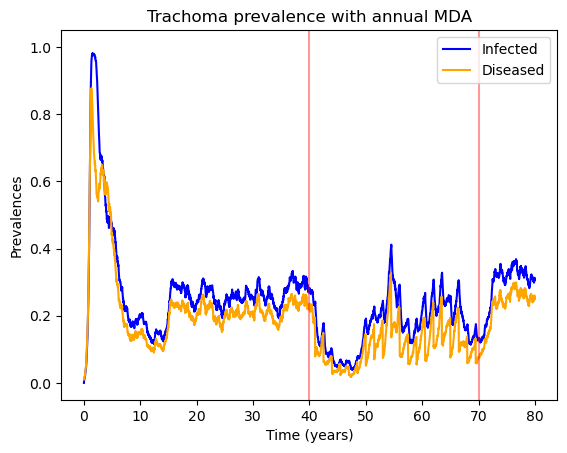

In [16]:
# run simulation
output = sim_ind_MDA(parameters, vals, timesim, demog, bet)

# add extra for child-only prevalences
times, infections, diseases = output['times'], output['infections'], output['diseases']

# plot time against infections

plt.plot(times, infections, color = 'blue', label = 'Infected')
plt.plot(times, diseases, color = 'orange', label = 'Diseased')
plt.xlabel('Time (years)')
plt.ylabel('Prevalences')
plt.title('Trachoma prevalence with annual MDA')
plt.legend()
plt.ylim([-0.05, 1.05])
plt.axvline(x=burnin/52, color = 'r', alpha = 0.4)
plt.axvline(x=burnin/52 + sim_params['N_MDA']*sim_params['freq_MDA'], color = 'r', alpha = 0.4)

### Run many simulations (decide what to do with this)

In [17]:
# in place of the randomly sampled array of 'bet', just create this before each simulation